## CS 231N-kaggle amazon forest challenge

In [1]:
# some set up
import sys
import math
import os
import skimage.io as io
import imp
import tensorflow as tf
import prep_utils
prep_utils = imp.reload(prep_utils)
from prep_utils import *

from models import image_prep_helpers as helpers
helpers = imp.reload(helpers)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
import time
%matplotlib inline

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

Using TensorFlow backend.


### process raw training and test data and save the processed data into .npz

In [2]:
#processing training data (uncomment if processing raw data)
# train_csv_path = 'data/train.csv'
# test_csv_path = 'data/test.csv'
# train_jpg_path = 'data/image/train-jpg' 
# test_jpg_path = 'data/image/test-jpg'
# test_jpg_path_a = 'data/test-jpg-additional' 
# train_tif_path = 'data/image/train-tif'
# test_tif_path = 'data/image/test-tif' 
# paths = (train_csv_path, test_csv_path, train_jpg_path, test_jpg_path, 
#           test_jpg_path_a, train_tif_path, test_tif_path )

# x_train, y_train, x_val, y_val = process_raw_data_train(data_root, train_ratio = 0.9, paths = paths)

In [3]:
# processing test data (TBD)
# x_test, y_test = process_raw_data_test(data_root)

## load processed training and evaluation data:

In [4]:
# get unique list of labels from training csv
data_root = 'data/'
TRAIN_LABEL_CSV_PATH = os.path.join(data_root, 'train.csv')
y, label_list, _, tags = prep_utils.read_labels(TRAIN_LABEL_CSV_PATH)

tic = time.time()
npzfile = np.load(os.path.join(data_root,'data_train_processed.npz'))
print(npzfile.keys())
x_train, y_train, x_val, y_val  = \
            npzfile['arr_0'],npzfile['arr_1'],npzfile['arr_2'],npzfile['arr_3']
# x_train, y_train, x_val, y_val  = \
#             npzfile['x_train'],npzfile['y_train'],npzfile['x_val'],npzfile['y_val']
toc = time.time()
print(toc-tic)
print('x_train:',x_train.shape)
print('y_train',y_train.shape)
print('x_val', x_val.shape)
print('y_val', y_val.shape)

# crop the center of the images.
x_train = helpers.central_crop_images(x_train[:,:,:,:3], 224, 224)
x_val = helpers.central_crop_images(x_val[:,:,:,:3], 224, 224)

tags = y2tags(y_train, label_list)
n = len(tags)
c = collections.Counter(tags)
print('20 most common tags:')
print(c.most_common(20))
print(label_list)
print(np.sum(y,axis=0))

['arr_1', 'arr_0', 'arr_3', 'arr_2']
14.66875696182251
x_train: (36000, 256, 256, 4)
y_train (36000, 17)
x_val (4479, 256, 256, 4)
y_val (4479, 17)
20 most common tags:
[('clear primary', 12141), ('partly_cloudy primary', 3232), ('cloudy', 1849), ('clear primary water', 1645), ('clear primary agriculture road', 1488), ('clear primary agriculture', 1445), ('haze primary', 1307), ('clear primary agriculture cultivation', 1065), ('clear primary agriculture habitation road', 1004), ('clear primary agriculture water', 638), ('partly_cloudy primary agriculture', 608), ('partly_cloudy primary water', 531), ('partly_cloudy primary agriculture road', 459), ('clear primary water road', 446), ('clear primary cultivation', 426), ('clear primary agriculture water road', 397), ('clear primary agriculture road cultivation', 340), ('haze primary water', 287), ('partly_cloudy primary agriculture cultivation', 276), ('clear primary agriculture habitation road cultivation', 250)]
['clear', 'haze', 'partl

In [5]:
# remove weather and primary tags and rare labels
# tags_weather = [0,1,2,3,4]
# tags_rare    = [10,11,12,13,14,15,16]
# tags_del     = tags_weather+tags_rare
# x_train, y_train, label_list = deleteTags(x_train, y_train, tags_del = tags_del, 
#                                           label_list = label_list, retain = 0.25)

# # remove weather and primary tags and rare labels
# x_val, y_val,_ = deleteTags(x_val, y_val, tags_del = tags_del, retain = 1)

# print('x_train:',x_train.shape)
# print('y_train',y_train.shape)
# print('x_val', x_val.shape)
# print('y_val', y_val.shape)

# print(label_list)
# print(np.sum(y_train,axis=0))

# tags = y2tags(y_train, label_list)
# n = len(tags)
# c = collections.Counter(tags)
# print('20 most common tags:')
# print(c.most_common(20))

In [15]:
# balance the dataset
x_train, y_train = balance_data(x_train, y_train, label_list, top = 5)

20 most common tags:
[('clear primary', 12141), ('partly_cloudy primary', 3232), ('cloudy', 1849), ('clear primary water', 1645), ('clear primary agriculture road', 1488), ('clear primary agriculture', 1445), ('haze primary', 1307), ('clear primary agriculture cultivation', 1065), ('clear primary agriculture habitation road', 1004), ('clear primary agriculture water', 638), ('partly_cloudy primary agriculture', 608), ('partly_cloudy primary water', 531), ('partly_cloudy primary agriculture road', 459), ('clear primary water road', 446), ('clear primary cultivation', 426), ('clear primary agriculture water road', 397), ('clear primary agriculture road cultivation', 340), ('haze primary water', 287), ('partly_cloudy primary agriculture cultivation', 276), ('clear primary agriculture habitation road cultivation', 250)]
none top data number: 15645
Total number of data: 23085
20 most common tags after balancing the dataset:
[('clear primary agriculture road', 1488), ('partly_cloudy primary'

## Create small dataset for testing the code

In [52]:
print(x_train.shape)

(23085, 224, 224, 3)


In [9]:
n_train_small = 5000
n_val_small = 500
mask_train_small = np.random.choice(y_train.shape[0], n_train_small, replace=False)
mask_val_small = np.random.choice(y_val.shape[0], n_val_small, replace=False)
x_train_small = x_train[mask_train_small]
y_train_small = y_train[mask_train_small]
x_val_small   = x_val[mask_val_small]
y_val_small   = y_val[mask_val_small]

print('x_train_small:',x_train_small.shape)
print('y_train_small',y_train_small.shape)
print('x_val_small', x_val_small.shape)
print('y_val_small', y_val_small.shape)
# np.savez(os.path.join(data_root,'train_data_small'),x_train=x_train_small, y_train=y_train_small,
#                             x_val=x_val_small, y_val=y_val_small)

x_train_small: (5000, 224, 224, 3)
y_train_small (5000, 17)
x_val_small (500, 224, 224, 3)
y_val_small (500, 17)


## Some sample training images in jpg

In [1]:
# plt.rcParams['figure.figsize'] = (16.0, 16.0) # set default size of plots
# index = np.random.choice(x_train_small.shape[0], 16, replace=False)
# for i in range(16):
#     plt.subplot(4,4,i+1)
#     plt.imshow(x_train_small[index[i],:,:,:3])
#     plt.title(y2tags(y_train_small[index[i],:], label_list),fontsize=10)

# Train a pretrained VGG 16 model on small dataset

### Load small data set and model weights

In [4]:
data_root='data'
helpers = imp.reload(helpers)
npzfile_small = np.load(os.path.join(data_root,'train_data_small.npz'))
print(npzfile_small['x_val'].shape)
# load small data set
x_train_small, y_train_small, x_val_small, y_val_small  = \
            npzfile_small['x_train'],npzfile_small['y_train'],npzfile_small['x_val'],npzfile_small['y_val']

# crop the center of the images.
x_train_small = helpers.central_crop_images(x_train_small[:,:,:,:3], 224, 224)
x_val_small = helpers.central_crop_images(x_val_small[:,:,:,:3], 224, 224)
print('x_train_small:',x_train_small.shape)
print('y_train_small',y_train_small.shape)
print('x_val_small', x_val_small.shape)
print('y_val_small', y_val_small.shape)

# vgg16_weights_path = 'models/vgg16_weights.npz'
# vgg_weights_npzf = np.load(vgg16_weights_path)
# print('Weights and Biases:')
# print(sorted(vgg_weights_npzf.keys()))

(100, 256, 256, 4)
x_train_small: (1000, 224, 224, 3)
y_train_small (1000, 17)
x_val_small (100, 224, 224, 3)
y_val_small (100, 17)


In [8]:
tags_weather = [0,1,2,3]
tags_rare    = [10,11,12,13,14,15,16]
tags_del     = tags_weather+tags_rare
TRAIN_LABEL_CSV_PATH = os.path.join(data_root, 'train.csv')
_, label_list, _, tags = prep_utils.read_labels(TRAIN_LABEL_CSV_PATH)

# remove weather and primary tags
x_train_small, y_train_small, label_list = deleteTags(x_train_small, y_train_small, 
                                             tags_del = tags_del, label_list = label_list, retain = 0)
# remove weather and primary tags
x_val_small, y_val_small,_ = deleteTags(x_val_small, y_val_small, tags_del = tags_del, retain = 1)

print('x_train:',x_train_small.shape)
print('y_train',y_train_small.shape)
print('x_val', x_val_small.shape)
print('y_val', y_val_small.shape)

print(label_list)
print(np.sum(y_train_small,axis=0))

tags = y2tags(y_train_small, label_list)
n = len(tags)
c = collections.Counter(tags)
print('20 most common tags:')
print(c.most_common(20))

x_train: (947, 224, 224, 3)
y_train (947, 6)
x_val (100, 224, 224, 3)
y_val (100, 6)
['primary', 'agriculture', 'water', 'habitation', 'road', 'cultivation']
[934 310 201  96 194 124]
20 most common tags:
[('primary', 473), ('primary water', 81), ('primary agriculture', 55), ('primary agriculture cultivation', 47), ('primary agriculture road', 46), ('primary agriculture habitation road', 40), ('primary agriculture water', 28), ('primary agriculture water road', 24), ('primary water road', 15), ('primary agriculture water cultivation', 14), ('primary cultivation', 14), ('primary road', 13), ('primary agriculture habitation road cultivation', 10), ('primary water cultivation', 10), ('primary agriculture habitation', 10), ('primary agriculture road cultivation', 10), ('primary habitation road', 8), ('primary agriculture water habitation road', 7), ('water', 5), ('primary agriculture water road cultivation', 4)]


### balance the dataset:

In [9]:
import collections
prep_utils = imp.reload(prep_utils)
from prep_utils import *

x_train_small, y_train_small = balance_data(x_train_small, y_train_small, label_list, top = 5)
print('x_train_small:',x_train_small.shape)
print('y_train_small',y_train_small.shape)
print('x_val_small', x_val_small.shape)
print('y_val_small', y_val_small.shape)

20 most common tags:
[('primary', 473), ('primary water', 81), ('primary agriculture', 55), ('primary agriculture cultivation', 47), ('primary agriculture road', 46), ('primary agriculture habitation road', 40), ('primary agriculture water', 28), ('primary agriculture water road', 24), ('primary water road', 15), ('primary agriculture water cultivation', 14), ('primary cultivation', 14), ('primary road', 13), ('primary agriculture habitation road cultivation', 10), ('primary water cultivation', 10), ('primary agriculture habitation', 10), ('primary agriculture road cultivation', 10), ('primary habitation road', 8), ('primary agriculture water habitation road', 7), ('water', 5), ('primary agriculture water road cultivation', 4)]
none top data number: 124
Total number of data: 264
20 most common tags after balancing the dataset:
[('primary agriculture water', 14), ('primary', 14), ('primary agriculture water road', 14), ('primary water road', 14), ('primary agriculture habitation road', 

In [32]:
print(np.sum(y_train_small,axis=0))

[3564  329  858  249 4652 1496  909  464  974  573   36   49   28   12  110
   54   13]
[338  33 106  23 468 170  90  49 113  52   1   5   4   0  11   3   2]


### test the data augmentation

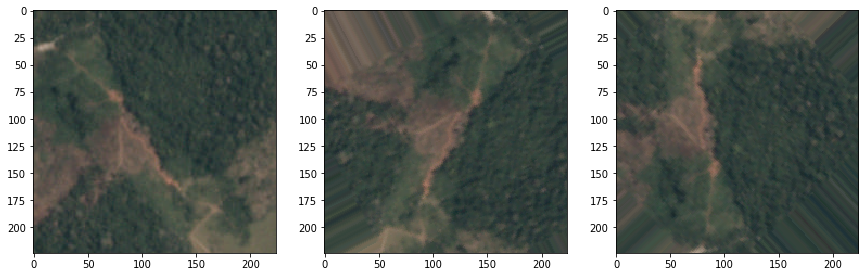

In [35]:
plt.rcParams['figure.figsize'] = (20.0, 10.0) # set default size of plots
helpers = imp.reload(helpers)
from keras.preprocessing.image import ImageDataGenerator
# generate a batch of augmented images.
# x_batch, y_batch =ImageDataGenerator().flow(x_train_small[5:6,:,:,:], y_train_small[5:6,:], 1).next()
n=250
x_batch, y_batch = helpers.batch_data_generator_train(x_train_small[n:n+1,:,:,:], y_train_small[n:n+1,:], 1).next()
x_batch = x_batch.astype(np.uint8)
x_original, y_original = x_train_small[n,:,:,:], y_train_small[n,:]

plt.subplot(1,4,1)
plt.imshow(x_original)
plt.subplot(1,4,2)
plt.imshow(x_batch[0,:,:,:])

x_batch, y_batch = helpers.batch_data_generator_train(x_train_small[n:n+1,:,:,:], y_train_small[n:n+1,:], 1).next()
x_batch = x_batch.astype(np.uint8)
plt.subplot(1,4,3)
plt.imshow(x_batch[0,:,:,:])

# x_batch, y_batch = helpers.batch_data_generator_train(x_train_small[n:n+1,:,:,:], y_train_small[n:n+1,:], 1).next()
# x_batch = x_batch.astype(np.uint8)

# plt.subplot(1,4,4)
# plt.imshow(x_batch[0,:,:,:])


In [30]:
#get a weights for different classes.
frq = np.sum(y_train_small, axis=0).astype(np.float32)
# weights_classes = 1 - frq/np.sum(frq)
weights_classes = np.max(frq)/frq
print(weights_classes)
# [934 310 201 96 194 124]

[ 1.          1.59301591  3.2166667   1.55741775  2.66348195]


In [16]:
import tensorflow as tf
import models.vgg16_trainable
imp.reload(models.vgg16_trainable)
from models.vgg16_trainable import vgg16_trainable as vgg16

x_mean, x_std = mean_std_batch(x_train_small, batch_size = 100)

lr  = 5e-5
_, num_classes = y_train_small.shape
vgg16_weights_path = 'models/vgg16_weights.npz'
tf.reset_default_graph()
# sess = get_session()

with tf.Session() as sess:
    vgg = vgg16(vgg16_weights_path, sess, learning_rate = 5e-5, drop_out = 0.5, 
                lr_decay = 0.9, max_epoch = 10,height=224, width=224, channel=3,
                num_classes=num_classes, x_mean = x_mean, x_std =x_std)

    learning_history = {}

    with tf.device("/gpu:0"): #"/cpu:0" or "/gpu:0" 
        print("######### lr: %e #########" %(lr))
        tic = time.time()
        vgg.lr_val = lr
        init = tf.global_variables_initializer()

        # initialize:
        sess.run(init)

        print('Training')
        vgg.run_model(sess, x_train_small, y_train_small, 
                  x_val_small, y_val_small, epochs = 30, 
                  batch_size = 100, print_every = 20, training = True,
                  plot_losses = False, verbose=True, 
                  checkpoint_path = None, data_augmentation = True)

        toc = time.time()
        # randomly select some pictures and compare prediction and ground truth
        index = np.random.choice(x_val_small.shape[0], 20, replace=False)
        x_test = x_val_small[index,:,:,:3]
        y_test = y_val_small[index,:]
        tag_test = y2tags(y_test, label_list)
        y_test_pred, tag_test_pred=vgg.predict_tag(sess, x_test, threshold = 0.5, label_list = label_list)

        print('Elaspe time: %f' % (toc-tic))
        print('Ground Truth and prediction:')
        print(tag_test)
        print(tag_test_pred)
        learning_history = {'val_acc': vgg.validation_acc,
                            'train_acc': vgg.train_acc ,
                            'loss':  vgg.losses ,
                            'train_score': vgg.train_fscore ,
                            'val_score':  vgg.val_fscore}

import pickle
data_save = {'learning_history': learning_history,
         'fields': ['val_acc','train_acc','loss','train_score','val_score']}
pickle.dump( data_save, open( "5000_balanced_with_augmentation_30_epochs.p", "wb" ) )

import scipy.io
scipy.io.savemat('5000_balanced_with_augmentation_30_epochs', learning_history)

done with mean (224, 224, 3)
done with std (224, 224, 3)
fc6_W is not assigned but initialized
fc6_b is not assigned but initialized
fc7_W is not assigned but initialized
fc7_b is not assigned but initialized
fc8_W is not assigned but initialized
fc8_b is not assigned but initialized
trainable variables:  ['conv5_1/weights:0', 'conv5_1/biases:0', 'conv5_2/weights:0', 'conv5_2/biases:0', 'conv5_3/weights:0', 'conv5_3/biases:0', 'fc/dense/kernel:0', 'fc/dense/bias:0', 'fc/batch_normalization/beta:0', 'fc/batch_normalization/gamma:0', 'fc/dense_1/kernel:0', 'fc/dense_1/bias:0', 'fc/batch_normalization_1/beta:0', 'fc/batch_normalization_1/gamma:0', 'fc/dense_2/kernel:0', 'fc/dense_2/bias:0']
######### lr: 5.000000e-05 #########
Training
Iteration 0: with minibatch training loss = 15.2 and accuracy of 0, F2 score: 0.400670
Iteration 20: with minibatch training loss = 7.36 and accuracy of 0.06, F2 score: 0.616374
Iteration 40: with minibatch training loss = 6.39 and accuracy of 0.07, F2 scor

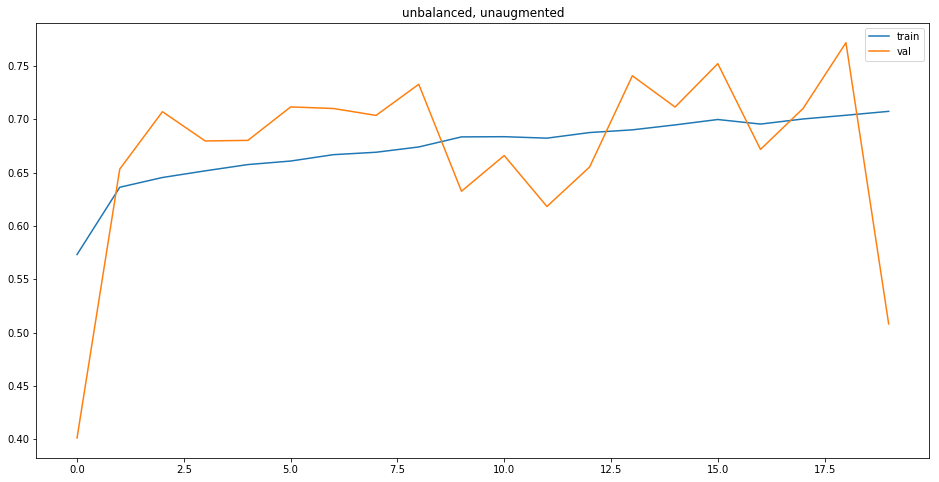

In [56]:
plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots
plt.plot(learning_history['train_score'])
plt.plot(learning_history['val_score'])
plt.legend(['train', 'val'])
plt.title('unbalanced, unaugmented')

In [17]:
zipped = zip(tag_test, tag_test_pred)
for a, b in zipped:
    print('GT:',a, 'prediction:',b)

GT: clear primary water prediction: clear primary
GT: clear primary prediction: clear primary
GT: clear primary prediction: primary
GT: haze primary prediction: haze primary
GT: clear primary agriculture cultivation prediction: clear primary
GT: clear primary prediction: clear primary
GT: clear primary agriculture habitation road prediction: partly_cloudy primary
GT: partly_cloudy primary agriculture water prediction: primary water
GT: partly_cloudy primary prediction: clear primary
GT: cloudy prediction: cloudy
GT: clear primary agriculture prediction: clear primary agriculture road
GT: clear primary agriculture road cultivation prediction: partly_cloudy primary
GT: haze primary prediction: partly_cloudy primary
GT: clear primary agriculture water cultivation prediction: clear primary road
GT: clear primary agriculture cultivation selective_logging prediction: clear primary
GT: haze primary prediction: partly_cloudy primary
GT: clear primary water prediction: clear primary
GT: clear p

In [41]:
import scipy.io
scipy.io.savemat('5000_unbalanced_no_augmentation', learning_history)

In [10]:
import models.vgg16_trainable
imp.reload(models.vgg16_trainable)
from models.vgg16_trainable import vgg16_trainable as vgg16
# randomly select some pictures and compare prediction and ground truth
index = np.random.choice(x_val_small.shape[0], 10, replace=False)
X_test = x_val_small[index,:,:,:3]
y_test_GT = y_val_small[index,:]
tag_test = y2tags(y_test, label_list)
# y_test_pred, tag_test_pred=vgg.predict_tag(sess, x_test, threshold = 0.5, label_list = label_list)

y_out       = logits2y(vgg.logits, threshold= threshold)
y_test_feed = np.zeros((X_test.shape[0], self.num_classes))
y_test      = np.zeros((X_test.shape[0], self.num_classes))

test_indicies = np.arange(X_test.shape[0])
for i in range(int(math.ceil(X_test.shape[0]/batch_size))):
    # generate indicies for the batch
    start_idx = (i*batch_size)%X_test.shape[0]
    idx = test_indicies[start_idx:start_idx+batch_size]

    # create a feed dictionary for this batch
    feed_dict_test = {self.x: X_test[idx,:],
                     self.y: y_test_feed[idx],
                     self.lr: self.lr_var,
                     self.istraining: False}

    y_pred_batch  = session.run(y_out, feed_dict=feed_dict_test)
    y_test[idx,:] = y_pred_batch

tag_test   = None
if label_list:
    tag_test   =  y2tags(y_test, label_list)

print('Elaspe time: %f' % (toc-tic))
print('Ground Truth and prediction:')
print(tag_test)
print(tag_test_pred)

NameError: name 'accuracy' is not defined

## visualize

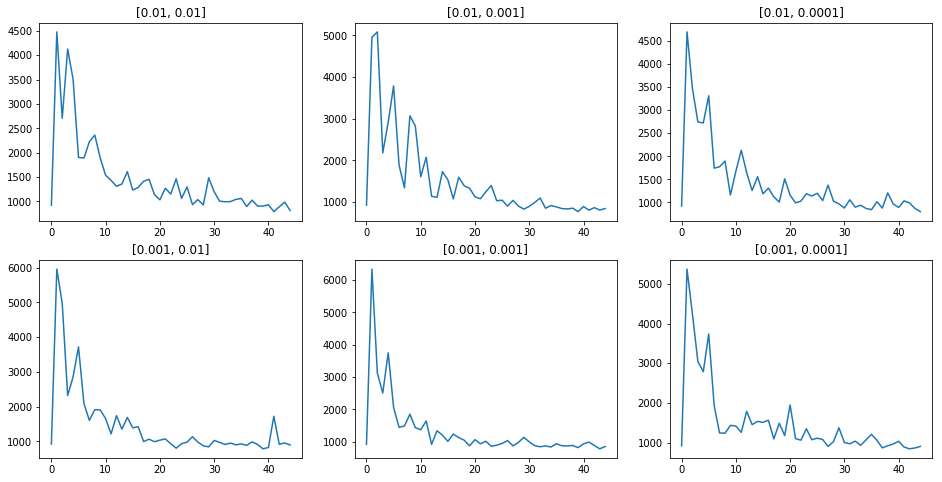

In [23]:
plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots
lrs  = [1e-2, 1e-3, 1e-4]
weight_scales = [1e-2, 1e-3]
i=0
for scale in weight_scales:
    for lr in lrs:
        i +=1 
        plt.subplot(2,3,i)
        plt.plot(learning_history[(lr, scale)] [2])
        plt.title([scale,lr])

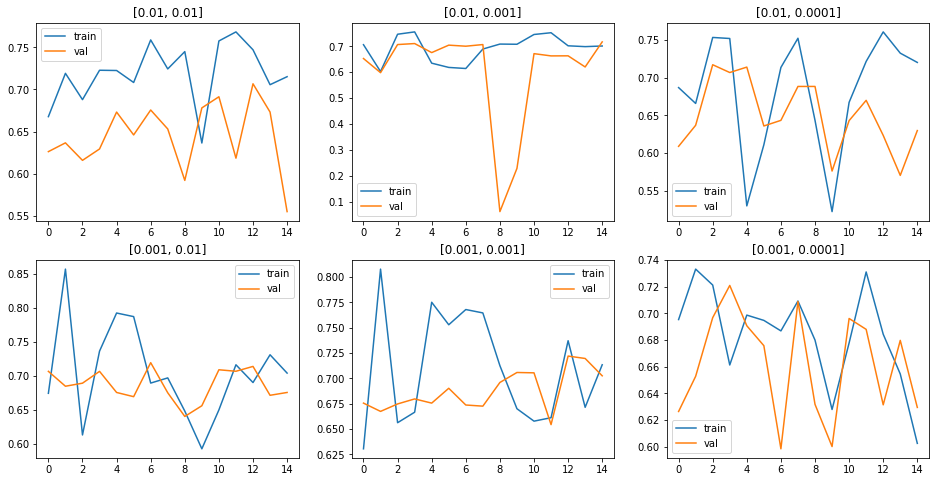

In [25]:
plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots
lrs  = [1e-2, 1e-3, 1e-4]
weight_scales = [1e-2, 1e-3]
i=0
for scale in weight_scales:
    for lr in lrs:
        i +=1 
        plt.subplot(2,3,i)
        plt.plot(learning_history[(lr, scale)] [3])
        plt.plot(learning_history[(lr, scale)] [4])
        plt.legend(['train','val'])
        plt.title([scale,lr])

In [50]:
# random take 16 images from the data.
import models.vgg16_trainable
imp.reload(models.vgg16_trainable)
from models.vgg16_trainable import vgg16_trainable as vgg16
plt.rcParams['figure.figsize'] = (16.0, 16.0) # set default size of plots
index = np.random.choice(x_val_small.shape[0], 16, replace=False)
x_test = x_val_small[index,:,:,:3]
y_test = y_val_small[index,:]
sess= tf.Session()
y_test_pred, tag_test=vgg.predict_tag(sess, x_test, threshold = 0.5, label_list = label_list)

print('predicted')
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i,:,:,:3])
    plt.title(y2tags(y_test[i], label_list),fontsize=10)


FailedPreconditionError: Attempting to use uninitialized value conv2_1/weights
	 [[Node: conv2_1/weights/read = Identity[T=DT_FLOAT, _class=["loc:@conv2_1/weights"], _device="/job:localhost/replica:0/task:0/gpu:0"](conv2_1/weights)]]
	 [[Node: Cast_9/_25 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_314_Cast_9", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'conv2_1/weights/read', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 405, in start
    ioloop.IOLoop.instance().start()
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2902, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3006, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-47-65a4f0c8bc94>", line 17, in <module>
    num_classes=num_classes, x_mean = x_mean, x_std =x_std)
  File "/home/Chaovite/cs231n-kaggle-amazon/models/vgg16_trainable.py", line 60, in __init__
    self.convlayers()
  File "/home/Chaovite/cs231n-kaggle-amazon/models/vgg16_trainable.py", line 341, in convlayers
    with tf.variable_scope('conv2_1') as scope:
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 988, in get_variable
    custom_getter=custom_getter)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 890, in get_variable
    custom_getter=custom_getter)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 348, in get_variable
    validate_shape=validate_shape)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 333, in _true_getter
    caching_device=caching_device, validate_shape=validate_shape)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py", line 684, in _get_single_variable
    validate_shape=validate_shape)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 197, in __init__
    expected_shape=expected_shape)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 315, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1490, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/cs231n/myVE35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv2_1/weights
	 [[Node: conv2_1/weights/read = Identity[T=DT_FLOAT, _class=["loc:@conv2_1/weights"], _device="/job:localhost/replica:0/task:0/gpu:0"](conv2_1/weights)]]
	 [[Node: Cast_9/_25 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_314_Cast_9", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


GT


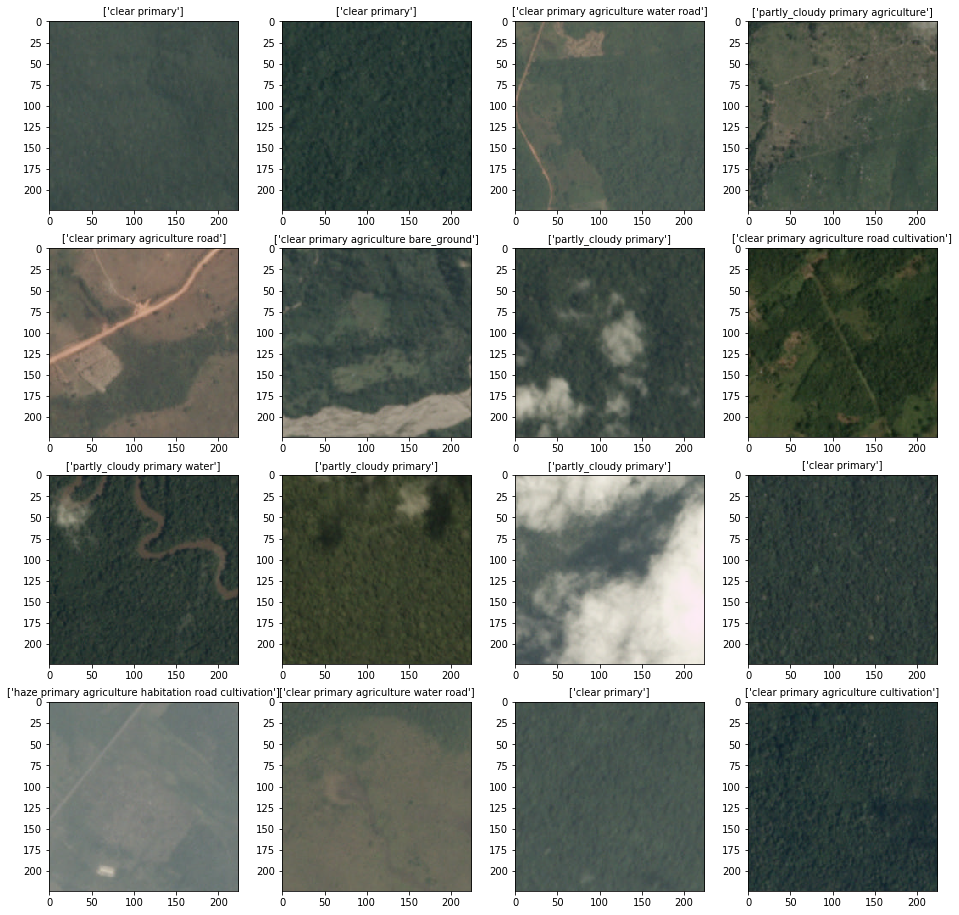

In [44]:
print('GT')
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i,:,:,:3])
    plt.title(y2tags(y_test[i], label_list),fontsize=10)

In [11]:
import pickle
data_save = {'lrs': lrs, 'weight_scales':weight_scales, 
             'learning_history': learning_history,
             'fields': ['val_acc','train_acc','loss','train_score','val_score']}
pickle.dump( data_save, open( "small_data_hyper_experiment.p", "wb" ) )

### Now train with large dataset ###

In [23]:
# compute the mean and std in batches
def mean_std_batch(x, batch_size = 2000):
    n          = x.shape[0]
    indicies   = np.arange(n)
    sums = np.zeros_like(x[0,...], dtype=np.float32)
    mean = np.zeros_like(sums)
    var = np.zeros_like(sums)
    std = np.zeros_like(sums)
    tic = time.time()
    # compute the mean
    for i in range(int(math.ceil(n/batch_size))):
        start_idx = (i*batch_size)%n
        idx = indicies[start_idx:start_idx+batch_size]
        sums += np.sum(x[idx,...].astype(np.float32),axis=0)
    mean = sums
    
    print('done with mean', mean.shape)
    
    for i in range(int(math.ceil(n/batch_size))):
        start_idx = (i*batch_size)%n
        idx = indicies[start_idx:start_idx+batch_size]
        var += np.sum((x[idx,...].astype(np.float32) - mean)
                      *(x[idx,...].astype(np.float32) - mean),axis=0)
    var = var/n
    std = np.sqrt(var)
    print('done with std', std.shape)
    return mean, std

In [4]:
print(x_train.shape)
x_mean, x_std=mean_std_batch(x_train, batch_size = 200)

(36000, 224, 224, 3)
done with mean (224, 224, 3)
done with std (224, 224, 3)


In [5]:
import tensorflow as tf
import models.vgg16_trainable
imp.reload(models.vgg16_trainable)
from models.vgg16_trainable import vgg16_trainable as vgg16

x_mean, x_std=mean_std_batch(x_train, batch_size = 500)

lr  = 5e-5
_, num_classes = y_train.shape

tf.reset_default_graph()
sess = get_session()
# define model:
vgg16_weights_path = 'models/vgg16_weights.npz'
vgg = vgg16(vgg16_weights_path, sess, learning_rate = 5e-5, drop_out =0.5, 
            lr_decay = 0.9, max_epoch = 5,height=224, width=224, channel=3,
            num_classes=num_classes, x_mean = x_mean, x_std =x_std)

learning_history = {}

# init = tf.global_variables_initializer()
# sess.run(init)
with tf.Session() as sess:
    with tf.device("/gpu:0"): #"/cpu:0" or "/gpu:0" 
        print("######### lr: %e, #########" %(lr))
        vgg.lr_val = lr
        init = tf.global_variables_initializer()

        # initialize:
        sess.run(init)

        print('Training')
        vgg.run_model(sess, x_train, y_train, 
                  x_val, y_val, epochs = 20, 
                  batch_size = 100, print_every = 50, training = True,
                  plot_losses = False, verbose = True, 
                  checkpoint_path = None, data_augmentation = True)

        # randomly select some pictures and compare prediction and ground truth
        index = np.random.choice(x_val.shape[0], 100, replace=False)
        x_test = x_val[index,:,:,:3]
        y_test = y_val[index,:]
        tag_test = y2tags(y_test, label_list)
        y_test_pred, tag_test_pred=vgg.predict_tag(sess, x_test, threshold = 0.5, label_list = label_list)

        print('Ground Truth and prediction:')
        for i in range(len(tag_test)):
            print(tag_test[i], tag_test_pred[i])

        learning_history = {'val_acc': vgg.validation_acc,
                            'train_acc': vgg.train_acc ,
                            'loss':  vgg.losses ,
                            'train_score': vgg.train_fscore ,
                            'val_score':  vgg.val_fscore}

import pickle
pickle.dump(learning_history, open( "large_unbalanced_with_augmentation_20_epochs.p", "wb" ) )

import scipy.io
scipy.io.savemat('large_unbalanced_with_augmentation_20_epochs', learning_history)

done with mean (224, 224, 3)
done with std (224, 224, 3)
fc6_W is not assigned but initialized
fc6_b is not assigned but initialized
fc7_W is not assigned but initialized
fc7_b is not assigned but initialized
fc8_W is not assigned but initialized
fc8_b is not assigned but initialized
trainable variables:  ['conv5_1/weights:0', 'conv5_1/biases:0', 'conv5_2/weights:0', 'conv5_2/biases:0', 'conv5_3/weights:0', 'conv5_3/biases:0', 'fc/dense/kernel:0', 'fc/dense/bias:0', 'fc/batch_normalization/beta:0', 'fc/batch_normalization/gamma:0', 'fc/dense_1/kernel:0', 'fc/dense_1/bias:0', 'fc/batch_normalization_1/beta:0', 'fc/batch_normalization_1/gamma:0', 'fc/dense_2/kernel:0', 'fc/dense_2/bias:0']
######### lr: 5.000000e-05, #########
Training
Iteration 0: with minibatch training loss = 13.8 and accuracy of 0, F2 score: 0.488465
Iteration 50: with minibatch training loss = 4.87 and accuracy of 0.32, F2 score: 0.647112
Iteration 100: with minibatch training loss = 3.41 and accuracy of 0.39, F2 sc

### Fine tune 3 Fully connected layers.

In [5]:
import tensorflow as tf
import models.vgg16_trainable
imp.reload(models.vgg16_trainable)
from models.vgg16_trainable import vgg16_trainable as vgg16

x_mean = np.reshape(x_train,(-1, 4)).mean(axis=0)[np.newaxis,np.newaxis,np.newaxis,:3]
print(x_mean)
lrs  = [5e-1, 1e-2, 1e-3] 
weight_scales = [1e-2]
vgg16_weights_path = 'models/vgg16_weights.npz'
tf.reset_default_graph()
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
weight_scale  = tf.placeholder(tf.float32, name='weight_scale')
sess = get_session()

# define model:
vgg = vgg16(vgg16_weights_path, sess, learning_rate=5e-4, weight_scale = 1e-5,
            height=224, width=224, channel=3, num_classes=17, x_mean=x_mean)

init = tf.global_variables_initializer()
sess.run(init)
with tf.device("/gpu:0"): #"/cpu:0" or "/gpu:0" 
    for lr in lrs:
        for scale in weight_scales:
            print("######### lr: %e, weight scale: %e #########" %(lr, scale))
            # initialize:
            sess.run(init, feed_dict={learning_rate: lr, weight_scale: scale})
            print('Training')
            vgg.run_model(sess, x_train[:,:224,:224,:3], y_train, 
                      x_val[:,:224,:224,:3], y_val, epochs = 20, 
                      batch_size = 100, print_every = 50, training = True,
                      plot_losses = False, verbose = True, checkpoint_path = None)
                #         print('Validation')
                        #         run_model(sess,y_out,mean_loss,X_val,y_val,epochs=1,batch_size=64)

[[[[ 79.33985045  86.77237414  76.15658341]]]]
fc8_W is not assigned but initialized
fc8_b is not assigned but initialized
trainable variables:  ['fc6/weights:0', 'fc6/biases:0', 'fc7/weights:0', 'fc7/biases:0', 'fc8/weights:0', 'fc8/biases:0']
######### lr: 1.000000e-01, weight scale: 1.000000e-02 #########
Training
Iteration 0: with minibatch training loss = 11.8 and accuracy of 0, F2 score: 0.686007
Elapse time from last print 11.851243
Iteration 50: with minibatch training loss = 1.79e+04 and accuracy of 0.28, F2 score: 0.656456
Elapse time from last print 3.360492
Iteration 100: with minibatch training loss = 1.29e+05 and accuracy of 0.39, F2 score: 0.476389
Elapse time from last print 3.350784
Iteration 150: with minibatch training loss = 11.2 and accuracy of 0, F2 score: 0.487260
Elapse time from last print 3.338397
Iteration 200: with minibatch training loss = 10.9 and accuracy of 0, F2 score: 0.479922
Elapse time from last print 3.349833
Iteration 250: with minibatch training 

KeyboardInterrupt: 